In [1]:
from fredpy import series,window_equalize,quickplot
import matplotlib.pyplot as plt
import numpy as np
import urllib
%matplotlib inline

In [2]:
# 0. Define a function for formatting plots
def plotFormat(xlabel='',ylabel='',title='',grid=True,filename=None,dpi=120):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(grid)
    fig.autofmt_xdate()
    if type(filename)==str:
        plt.savefig(filename+'.png',bbox_inches='tight',dpi=dpi)

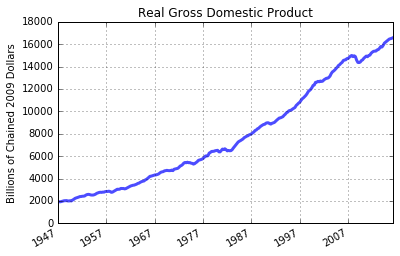

In [3]:
# 1. fredpy.series initialization and methods

# 1.1 Series initialization and plotting

# 1.1.1 Construct a series object for US real GDP
gdp = series('GDPC1')

# 1.1.2 Plot using the .datetimes and .data attributes
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(gdp.datetimes,gdp.data,'b-',lw=3,alpha = 0.7)
plotFormat(xlabel='',ylabel=gdp.units,title=gdp.title,grid=True,filename='fig_usRealGdp',dpi=120)

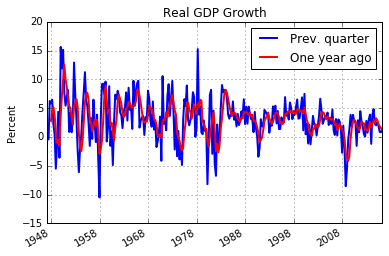

In [4]:
# 1.2 Calculating percent changes

# 1.2.1 Real GDP percent change from previous quarter (annualized):
gdp1 = series('GDPC1')
gdp1.pc(annualized=True)

# 1.2.2 Real GDP percent change from 1 year ago:
gdp2 = series('GDPC1')
gdp2.apc()

# 1.2.3 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(gdp1.datetimes,gdp1.data,'b-',lw=2)
ax.plot_date(gdp2.datetimes,gdp2.data,'r-',lw=2)
plotFormat(xlabel='',ylabel='Percent',title='Real GDP Growth')
legend = ax.legend(['Prev. quarter','One year ago'],loc='upper right')
legend.get_frame().set_facecolor('white')

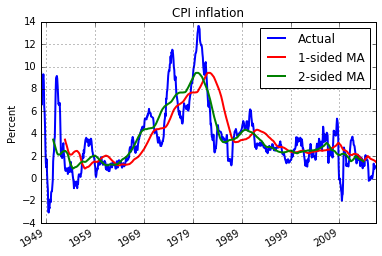

In [5]:
# 1.3 Calculating 1- and 2-sided moving averages

# 1.3.1 Construct annual percentage change in the CPI
cpi = series('CPIAUCSL')
cpi.apc()

# 1.3.2 Create moving 5 year moving averages. Note the different interpretations of the length argument
cpi.ma1side(length=60)
cpi.ma2side(length=30)

# 1.3.3 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(cpi.datetimes,cpi.data,'b-',lw=2)
ax.plot_date(cpi.ma1datetimes,cpi.ma1data,'r-',lw=2)
ax.plot_date(cpi.ma2datetimes,cpi.ma2data,'g-',lw=2)
plotFormat(xlabel='',ylabel='Percent',title='CPI inflation')
legend = ax.legend(['Actual','1-sided MA','2-sided MA'],loc='upper right')
legend.get_frame().set_facecolor('white')

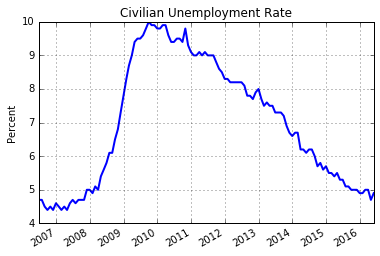

In [6]:
# 1.4 Restrict a series to only the most recent N values

# 1.4.1 The most recent 10 years of the unemployment rate (N=120 because the unemployment rate is monthly)
unemployment = series('UNRATE')
unemployment.recent(N=120)

# 1.4.2 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(unemployment.datetimes,unemployment.data,'b-',lw=2)
plotFormat(xlabel='',ylabel='Percent',title=unemployment.title)

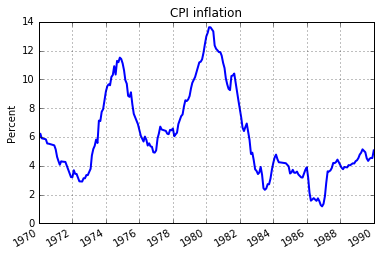

In [7]:
# 1.5 Restrict a series to a specific date range

# 1.5.1 US CPI inflation between January 1, 1970 and January 1, 1990
cpi = series('CPIAUCSL')
cpi.apc()
cpi.window(['01-01-1970','01-01-1990'])

# 1.5.2 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(cpi.datetimes,cpi.data,'b-',lw=2)
plotFormat(xlabel='',ylabel='Percent',title='CPI inflation')

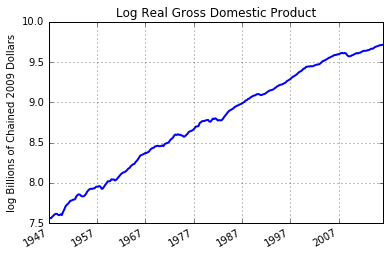

In [8]:
# 1.6 The natural log of a series

# 1.6.1 log real GDP
gdp = series('GDPC1')
gdp.log()

# 1.6.2 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(gdp.datetimes,gdp.data,'b-',lw=2)
plotFormat(xlabel='',ylabel=gdp.units,title=gdp.title)

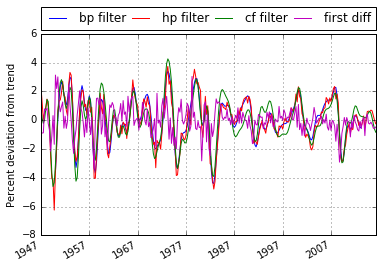

In [9]:
# 1.7 Isolating business cycles

# 1.7.1 log real GDP
gdp = series('GDPC1')
gdp.log()

# 1.7.2
gdp.bpfilter()
gdp.hpfilter()
gdp.cffilter()
gdp.firstdiff()
# gdp.lintrend()

# 1.7.3 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(gdp.bpdatetimes,100*gdp.bpcycle,'b-',lw=1)
ax.plot_date(gdp.datetimes,100*gdp.hpcycle,'r-',lw=1)
ax.plot_date(gdp.datetimes,100*gdp.cfcycle,'g-',lw=1)
ax.plot_date(gdp.diffdatetimes,100*gdp.diffcycle,'m-',lw=1)
# ax.plot_date(gdp.datetimes,100*gdp.lincycle,'c-',lw=1)
ax.legend(['bp filter','hp filter','cf filter','first diff'],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=4, mode="expand", borderaxespad=0.)
plotFormat(xlabel='',ylabel='Percent deviation from trend',title='')

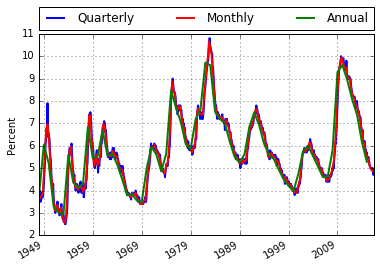

In [10]:
# 1.8 Converting from higher to lower frequencies

# 1.8.1 Quarterly unemployment
unemploymentQ = series('UNRATE')

# 1.8.2 Monthly unemployment
unemploymentM = series('UNRATE')
unemploymentM.monthtoquarter(method='average')

# 1.8.3 Annual unemployment
unemploymentA = series('UNRATE')
unemploymentA.monthtoannual(method='average')

# 1.8.4 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(unemploymentQ.datetimes,unemploymentQ.data,'b-',lw=2)
ax.plot_date(unemploymentM.datetimes,unemploymentM.data,'r-',lw=2)
ax.plot_date(unemploymentA.datetimes,unemploymentA.data,'g-',lw=2)
ax.legend(['Quarterly','Monthly','Annual'],bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=4, mode="expand", borderaxespad=0.)
plotFormat(xlabel='',ylabel='Percent',title='')

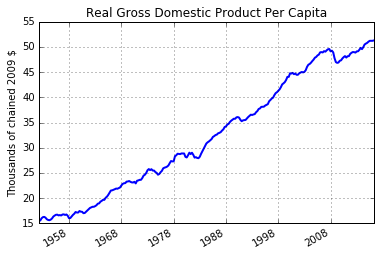

In [11]:
# 1.9 Per capita scaling

# 1.9.1 Real GDP per capita
gdp = series('GDPC1')
gdp.percapita()

# 1.1.2 Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(gdp.datetimes,1000*gdp.data,'b-',lw=2)
plotFormat(xlabel='',ylabel='Thousands of chained 2009 $',title=gdp.title)

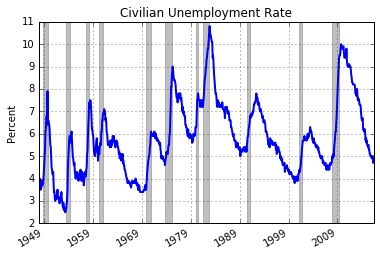

In [12]:
# 1.10 Recession bars

# 1.10.1 Unemployment rate
unemployment = series('UNRATE')

# 1.10.2 Plot with recession bars
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(unemployment.datetimes,unemployment.data,'b-',lw=2)
plotFormat(xlabel='',ylabel=unemployment.units,title=unemployment.title,grid=True)
unemployment.recessions()

In [13]:
# 2. Auxilary functions defined in the fredpy package

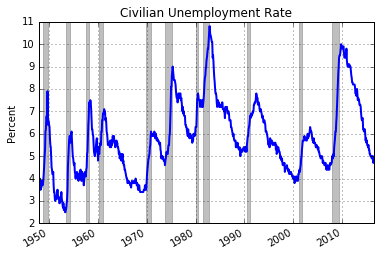

In [14]:
# 2.1 quickplot: construct a plot of a fredpy series quickly

unemployment = series('UNRATE')
quickplot(unemployment,year_mult=10,show=True,recess=True,save=False,name='file',width=2)

In [15]:
# 2.2 window_equalize: adjust dates for a list of fredpy series to correspond to the largest common date range

# 2.2.1 Construct series and print date minimums and maximums
unemployment = series('UNRATE')
tbill3m= series('TB3MS')
cpi = series('CPIAUCSL')
cpi.apc()

print(unemployment.daterange)
print(tbill3m.daterange)
print(cpi.daterange)
print()

# 2.2.2 Equalize date ranges:
window_equalize([unemployment,tbill3m,cpi])

print(unemployment.daterange)
print(tbill3m.daterange)
print(cpi.daterange)

Range: 1948-01-01 to 2016-06-01
Range: 1934-01-01 to 2016-07-01
Range: 1947-01-01 to 2016-06-01

1948-01-01 to 2016-06-01
1948-01-01 to 2016-06-01
1948-01-01 to 2016-06-01
